<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/Classifying_3_clusters_Qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-81-cfed14e462ba>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


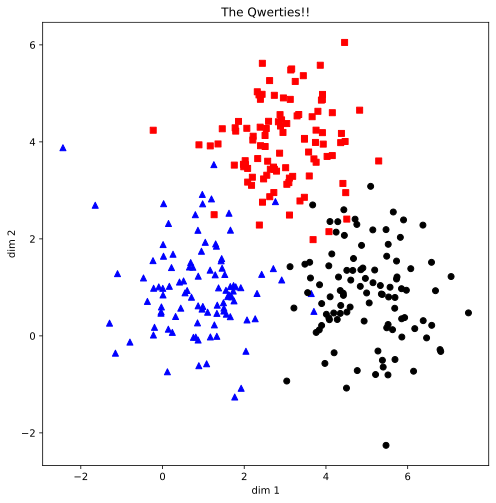

In [82]:
nPerClust = 100
blur = 1
A = [1, 1]
B = [5, 1]
C = [3, 4]

# generate the data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [ C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), 1 + np.ones((nPerClust, 1))))

# concentrate into a matrix
data_np = np.hstack((a, b, c)).T

data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize = (8, 8))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels==0)[0], 1], 'b^')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels==2)[0], 1], 'rs')
# plt.scatter(data[:, 0], data[:, 1], c=labels[:, 0], cmap='viridis', marker='o')
plt.title('The Qwerties!!')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.show()

In [83]:

ANNq = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Softmax(dim = 1)
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNq.parameters(), lr = 0.01)

In [84]:
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


# Train the model

In [85]:
numepochs = 10000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

  yHat = ANNq(data)

  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat, axis = 1) == labels
  matchesNumeric = matches.float()
  accuracyPct = 100 * torch.mean(matchesNumeric)
  ongoingAcc.append( accuracyPct )

predictions = ANNq(data)

predlabels = torch.argmax(predictions, axis = 1)
totalacc = 100 * torch.mean((predlabels == labels). float())


Final accuracy: 95.6667%


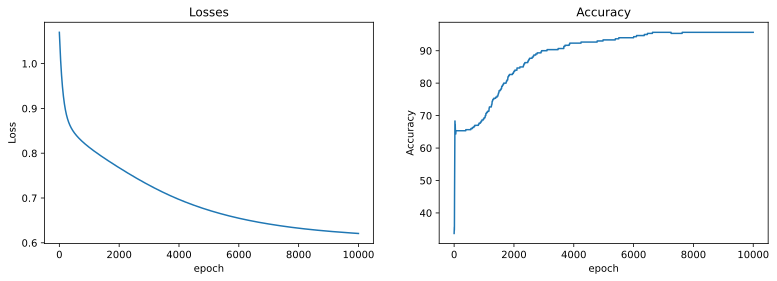

In [86]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig, ax = plt.subplots(1, 2, figsize = (13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [87]:
torch.sum(yHat, axis = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

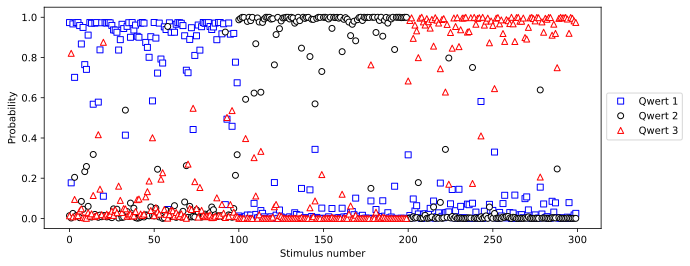

In [88]:
fig = plt.figure(figsize = (10, 4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
  plt.plot(yHat[:,i].detach(), colorshape[i], markerfacecolor = 'w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Qwert 1', 'Qwert 2', 'Qwert 3'], loc = (1.01, 0.4))
plt.show()